# PHSX 616: Measuring the Speed of Light
## Dr. Micheal Murray
## Brady Dunne and Christian Argueta

# Now we'll do the same for the 0.5 Mhz

In [2259]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd

In [2260]:
# Read in the data from two columns in a .csv file
df = pd.read_csv("4 Mhz - 67 - Ch1 - F0000CH1.csv")
xArray = df["Time"].values
yArray = df["Volts"].values
df = pd.read_csv("4 Mhz - 67 - Ch2 - F0000CH2.csv")
xArray1 = df["Time"].values
yArray1 = df["Volts"].values

In [2261]:
# scale xArray
xArray_scale = np.array([])

for x in xArray:
    value = x*(20000000)
    xArray_scale = np.append(xArray_scale,value)

In [2262]:
# scale yArray
yArray_scale = np.array([])

for y in yArray:
    value = y*(1.5)
    yArray_scale = np.append(yArray_scale,value)

In [2263]:
# scale xArray1
xArray_scale1 = np.array([])

for x in xArray1:
    value = x*(20000000)
    xArray_scale1 = np.append(xArray_scale1,value)

In [2264]:
# scale yArray
yArray_scale1 = np.array([])

for y in yArray1:
    value = y*(1/8)
    yArray_scale1 = np.append(yArray_scale1,value)

In [2265]:
# define a function that will be the sine fit
def fit(x,a,b,c):
    return a*((np.sin(b*x-c)))

In [2266]:
# fit the function to the data arrays
guess = [1, 1, 1]
popt, pcov = curve_fit(fit, xArray_scale, yArray_scale, guess)

print(popt)

# range to fit over
xFit = np.arange(-5, 5, 0.1)

[ 1.06074345  1.26465094 -0.150272  ]


In [2267]:
# fit the function to the data arrays with updated guess values
guess1 = [1, 1, 1]  # Updated guess values
popt1, pcov1 = curve_fit(fit, xArray_scale1, yArray_scale1, guess1)

print(popt1)

# range to fit over
xFit1 = np.arange(-5, 5, 0.1)

[ 1.17978363  1.25616533 -0.19000233]


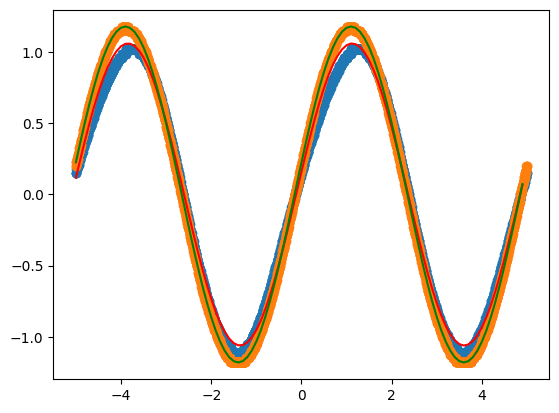

In [2268]:

plt.scatter(xArray_scale, yArray_scale, label="CH1")
plt.scatter(xArray_scale1, yArray_scale1, label="CH2")
plt.plot(xFit, fit(xFit, *popt), color="r", label="fit")
plt.plot(xFit1, fit(xFit1, *popt1), color="g", label="fit")

plt.show()

In [2269]:
time = popt[2]-popt1[2]
time

0.03973033170332457